In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dictionary from the .pkl file
input_path = "/data/sr933/scRCC/combined_data/RCC_data_dict.pkl"


with open(input_path, "rb") as f:
    data_dict = pickle.load(f)

# Access the contents of the dictionary
X_combined = data_dict["X"].T  # Transpose to get genes as columns
y_labels = data_dict["y"]  # Labels for cell types
gene_list = data_dict["Genes"]  # List of all genes

# Read the CSV file containing target genes
df = pd.read_csv('/home/sr933/rcc/4_network_analysis/data/key_proteins_up_down_no_common_essentials.txt')
target_genes_list = df['Gene'].tolist()

# Get indices of elements in target_genes_list from gene_list
indices = [i for i, element in enumerate(gene_list) if element in target_genes_list]

# Select columns based on indices for target genes
filtered_X = X_combined[:, indices]

# Create a DataFrame for filtered expression data, with genes as columns
filtered_df = pd.DataFrame(filtered_X, columns=target_genes_list)

# Create an empty DataFrame to store the average expression by cell type
avg_expression_by_cell_type = pd.DataFrame(columns=target_genes_list)

# Calculate the average expression for each gene across different cell types
# Calculate the median expression for each gene across different cell types
for gene in target_genes_list:
    # Clip the expression values at a maximum of 20
    avg_expression_by_cell_type[gene] = [
        np.log1p(np.mean(filtered_df.loc[y_labels == cell_type, gene]))
        for cell_type in np.unique(y_labels)
    ]



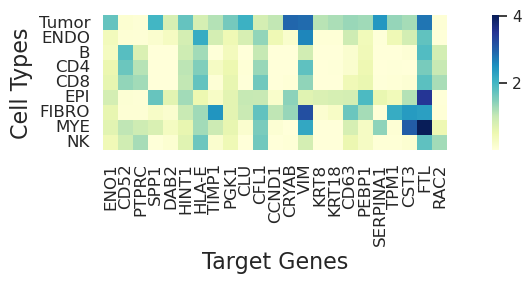

In [2]:
# Now let's create a bubble heatmap
params = {
        "ytick.color": "black",
        "xtick.color": "black",
        "axes.labelcolor": "black",
        "axes.edgecolor": "black",
        "text.usetex": False,
        "font.family": "serif",
        "font.sans-serif": "Helvetica",
    }
plt.rcParams.update(params)
plt.figure(figsize=(10, 3))
sns.set(style="whitegrid")

# Create a heatmap with size based on average expression
sns.heatmap(
    avg_expression_by_cell_type,
    cmap="YlGnBu",  # Color palette
    square=True
)

# Add labels and title
#plt.title("Average Log Expression of Target Genes Across Cell Types", fontsize=16)
plt.xlabel("Target Genes", fontsize=16)
target_cell_types = ["Tumor", "ENDO", "B", "CD4", "CD8", "EPI", "FIBRO", "MYE", "NK"]
plt.xticks(np.arange(len(target_genes_list))+np.ones(len(target_genes_list))/2, target_genes_list, fontsize=12, rotation=90)
plt.yticks(np.arange(len(target_cell_types))+np.ones(len(target_cell_types))/2, target_cell_types, fontsize=12, rotation=0)
plt.ylabel("Cell Types", fontsize=16)

# Show the plot
plt.tight_layout()
plt.savefig('/home/sr933/output/heatmap_target_genes_train.png', dpi=900)


# American datset

In [8]:
# Load the dictionary from the .pkl file
pickle_file_path = "/data/sr933/scRCC validation/processed data/scRCC_validation_data.pkl"  # Path where you saved the file

# Load the pickle file
with open(pickle_file_path, "rb") as pkl_file:
    loaded_validation_data = pickle.load(pkl_file)

X_combined=loaded_validation_data["X_data"]

# Filter X_data to only include rows present in target_indices
filtered_X = X_combined.loc[target_genes_list].to_numpy().T
y_labels=list(X_combined.columns)
y_labels.insert(0, y_labels.pop(y_labels.index("Tumor")))
y_labels=np.array(y_labels)
# Create a DataFrame for filtered expression data, with genes as columns
filtered_df = pd.DataFrame(filtered_X, columns=target_genes_list)

# Create an empty DataFrame to store the average expression by cell type
avg_expression_by_cell_type = pd.DataFrame(columns=target_genes_list)

# Calculate the average expression for each gene across different cell types
# Calculate the median expression for each gene across different cell types
for gene in target_genes_list:
    # Clip the expression values at a maximum of 20
    avg_expression_by_cell_type[gene] = [
        np.log1p(np.mean(filtered_df.loc[y_labels == cell_type, gene]))
        for cell_type in np.unique(y_labels)
    ]


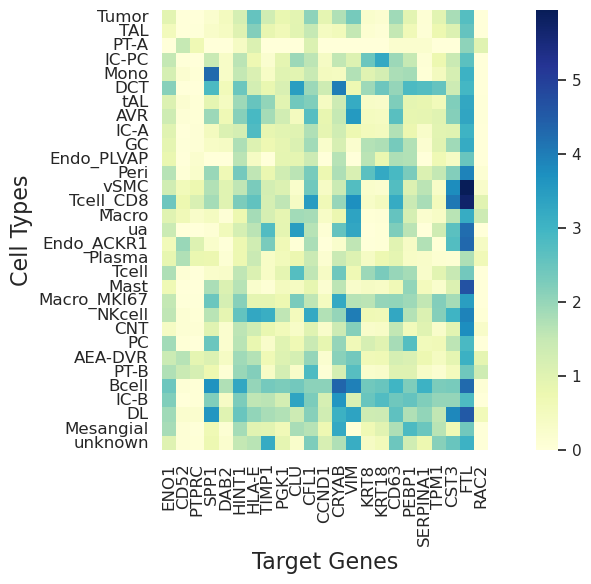

In [9]:
# Now let's create a bubble heatmap
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create a heatmap with size based on average expression
sns.heatmap(
    avg_expression_by_cell_type,
    cmap="YlGnBu",  # Color palette
    square=True
)

# Add labels and title
#plt.title("Average Log Expression of Target Genes Across Cell Types", fontsize=16)
plt.xlabel("Target Genes", fontsize=16)
target_cell_types = list(dict.fromkeys(y_labels))
plt.xticks(np.arange(len(target_genes_list))+np.ones(len(target_genes_list))/2, target_genes_list, fontsize=12, rotation=90)
plt.yticks(np.arange(len(target_cell_types))+np.ones(len(target_cell_types))/2, target_cell_types, fontsize=12, rotation=0)
plt.ylabel("Cell Types", fontsize=16)

# Show the plot
plt.tight_layout()
plt.savefig('/home/sr933/output/heatmap_target_genes_american.png', dpi=900)

# Chinese

In [21]:
# Load the dictionary from the .pkl file
pickle_file_path = "/data/sr933/scRCC validation/processed data/scRCC_validation_dataset_china.pkl"

# Load the pickle file
with open(pickle_file_path, "rb") as pkl_file:
    loaded_validation_data = pickle.load(pkl_file)

filtered_X=loaded_validation_data["X_test"]

y_labels=list(loaded_validation_data["y_test"])
y_labels = [x[:-1] if isinstance(x, str) else x for x in loaded_validation_data["y_test"]]
y_labels.insert(0, y_labels.pop(y_labels.index("Tumor")))
y_labels=np.array(y_labels)
# Create a DataFrame for filtered expression data, with genes as columns

df = pd.read_csv('/home/sr933/rcc/data/Target_genes.csv')
target_genes_list_all = df['Genes'].tolist()
filtered_df = pd.DataFrame(filtered_X, columns=target_genes_list_all)
filtered_df = filtered_df.loc[:, filtered_df.columns.isin(target_genes_list)]
# Create an empty DataFrame to store the average expression by cell type
avg_expression_by_cell_type = pd.DataFrame(columns=target_genes_list)

# Calculate the average expression for each gene across different cell types
# Calculate the median expression for each gene across different cell types
for gene in target_genes_list:
    # Clip the expression values at a maximum of 20
    avg_expression_by_cell_type[gene] = [
        np.log1p(np.mean(filtered_df.loc[y_labels == cell_type, gene]))
        for cell_type in np.unique(y_labels)
    ]


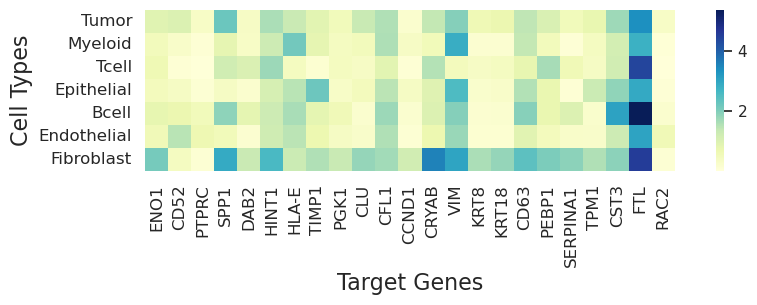

In [22]:
# Now let's create a bubble heatmap
plt.figure(figsize=(10, 3))
sns.set(style="whitegrid")

# Create a heatmap with size based on average expression
sns.heatmap(
    avg_expression_by_cell_type,
    cmap="YlGnBu",  # Color palette
    square=True
)

# Add labels and title
#plt.title("Average Log Expression of Target Genes Across Cell Types", fontsize=16)
plt.xlabel("Target Genes", fontsize=16)
target_cell_types = list(dict.fromkeys(y_labels))
plt.xticks(np.arange(len(target_genes_list))+np.ones(len(target_genes_list))/2, target_genes_list, fontsize=12, rotation=90)
plt.yticks(np.arange(len(target_cell_types))+np.ones(len(target_cell_types))/2, target_cell_types, fontsize=12, rotation=0)
plt.ylabel("Cell Types", fontsize=16)

# Show the plot
plt.tight_layout()
plt.savefig('/home/sr933/output/heatmap_target_genes_china.png', dpi=900)

# Lithuanian

In [23]:
pickle_file_path = "/data/sr933/scRCC validation/processed data/scRCC_validation_dataset_lithuanian.pkl"

# Load the pickle file
with open(pickle_file_path, "rb") as pkl_file:
    loaded_validation_data = pickle.load(pkl_file)

filtered_X=loaded_validation_data["X_test"].T
print(filtered_X)
y_labels=list(loaded_validation_data["y_test"])
print(y_labels)
y_labels=np.array(y_labels)
# Create a DataFrame for filtered expression data, with genes as columns

df = pd.read_csv('/home/sr933/rcc/data/Target_genes.csv')
target_genes_list_all = df['Genes'].tolist()
filtered_df = pd.DataFrame(filtered_X, columns=target_genes_list_all)
filtered_df = filtered_df.loc[:, filtered_df.columns.isin(target_genes_list)]
# Create an empty DataFrame to store the average expression by cell type
avg_expression_by_cell_type = pd.DataFrame(columns=target_genes_list)

# Calculate the average expression for each gene across different cell types
# Calculate the median expression for each gene across different cell types
for gene in target_genes_list:
    # Clip the expression values at a maximum of 20
    avg_expression_by_cell_type[gene] = [
        np.log1p(np.mean(filtered_df.loc[y_labels == cell_type, gene]))
        for cell_type in np.unique(y_labels)
    ]

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  4.  1.  5.]
 [ 2.  0.  3. ... 20.  6. 27.]
 ...
 [ 0.  0.  1. ...  5.  5.  9.]
 [ 0.  0.  0. ... 12.  6.  7.]
 [ 1.  0.  0. ...  3.  1.  4.]]
['Myeloid cells', 'Myeloid cells', 'Tumor cells', 'Tumor cells', 'Endothelium', 'Tumor cells', 'Myeloid cells', 'Lymphoid cells', 'Myeloid cells', 'Myeloid cells', 'Lymphoid cells', 'Myeloid cells', 'Lymphoid cells', 'Myeloid cells', 'Myeloid cells', 'Myeloid cells', 'Tumor cells', 'Tumor cells', 'Endothelium', 'Endothelium', 'Lymphoid cells', 'Endothelium', 'Tumor cells', 'Lymphoid cells', 'Myeloid cells', 'Myeloid cells', 'Myeloid cells', 'Myeloid cells', 'Stromal', 'Endothelium', 'Lymphoid cells', 'Myeloid cells', 'Lymphoid cells', 'Myeloid cells', 'Myeloid cells', 'Tumor cells', 'Endothelium', 'Endothelium', 'Myeloid cells', 'Lymphoid cells', 'Myeloid cells', 'Stromal', 'Myeloid cells', 'Tumor cells', 'Endothelium', 'Myeloid cells', 'Tumor cells', 'Tumor cells', 'Lymphoid cells', 'Lymphoid cel

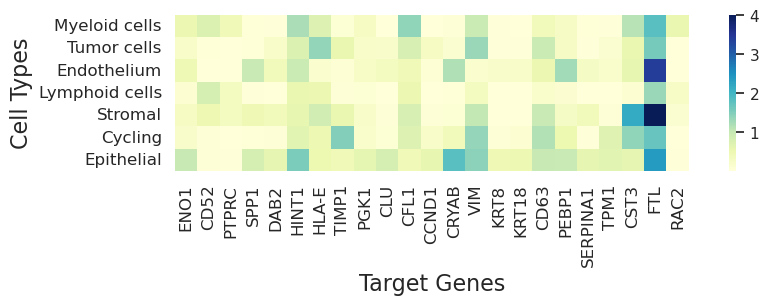

In [24]:
# Now let's create a bubble heatmap
plt.figure(figsize=(10, 3))
sns.set(style="whitegrid")

# Create a heatmap with size based on average expression
sns.heatmap(
    avg_expression_by_cell_type,
    cmap="YlGnBu",  # Color palette
    square=True
)

# Add labels and title
#plt.title("Average Log Expression of Target Genes Across Cell Types", fontsize=16)
plt.xlabel("Target Genes", fontsize=16)
target_cell_types = list(dict.fromkeys(y_labels))
plt.xticks(np.arange(len(target_genes_list))+np.ones(len(target_genes_list))/2, target_genes_list, fontsize=12, rotation=90)
plt.yticks(np.arange(len(target_cell_types))+np.ones(len(target_cell_types))/2, target_cell_types, fontsize=12, rotation=0)
plt.ylabel("Cell Types", fontsize=16)

# Show the plot
plt.tight_layout()
plt.savefig('/home/sr933/output/heatmap_target_genes_lithuania.png', dpi=900)

# Metastatic

In [3]:
pickle_file_path = "/data/sr933/scRCC validation/processed data/scRCC_validation_dataset_metastatic.pkl"

# Load the pickle file
with open(pickle_file_path, "rb") as pkl_file:
    loaded_validation_data = pickle.load(pkl_file)

filtered_X=loaded_validation_data["X_test"]
y_labels=list(loaded_validation_data["y_test"])
print(set(y_labels))
y_labels=np.array(y_labels)
# Create a DataFrame for filtered expression data, with genes as columns

df = pd.read_csv('/home/sr933/rcc/data/Target_genes.csv')
target_genes_list_all = df['Genes'].tolist()
filtered_df = pd.DataFrame(filtered_X, columns=target_genes_list_all)
filtered_df = filtered_df.loc[:, filtered_df.columns.isin(target_genes_list)]
# Create an empty DataFrame to store the average expression by cell type
avg_expression_by_cell_type = pd.DataFrame(columns=target_genes_list)

# Calculate the average expression for each gene across different cell types
# Calculate the median expression for each gene across different cell types
for gene in target_genes_list:
    # Clip the expression values at a maximum of 20
    avg_expression_by_cell_type[gene] = [
        np.log1p(np.mean(filtered_df.loc[y_labels == cell_type, gene]))
        for cell_type in np.unique(y_labels)
    ]

{np.str_('Osteoblasts1'), np.str_('mDC1'), np.str_('MSCs1'), np.str_('CTL1'), np.str_('Endothelial1'), np.str_('Progenitors1'), np.str_('Fibroblasts1'), np.str_('Macrophage1'), np.str_('NK1'), np.str_('Thelper1'), np.str_('Pericytes1'), np.str_('Other1'), np.str_('Erythroid1'), np.str_('Tumor1'), np.str_('Treg1'), np.str_('NKT1'), np.str_('Osteoclasts1'), np.str_('PDC1'), np.str_('Monocytes1')}


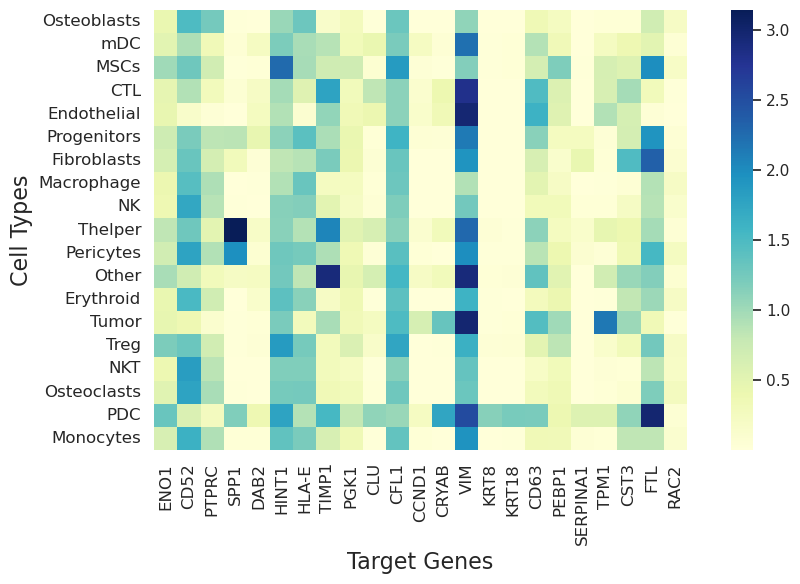

In [4]:
# Now let's create a bubble heatmap
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create a heatmap with size based on average expression
sns.heatmap(
    avg_expression_by_cell_type,
    cmap="YlGnBu",  # Color palette
    square=True
)

# Add labels and title
#plt.title("Average Log Expression of Target Genes Across Cell Types", fontsize=16)
plt.xlabel("Target Genes", fontsize=16)
target_cell_types = list(dict.fromkeys(y_labels))
target_cell_types = [x[:-1] for x in set(y_labels)]
plt.xticks(np.arange(len(target_genes_list))+np.ones(len(target_genes_list))/2, target_genes_list, fontsize=12, rotation=90)
plt.yticks(np.arange(len(target_cell_types))+np.ones(len(target_cell_types))/2, target_cell_types, fontsize=12, rotation=0)
plt.ylabel("Cell Types", fontsize=16)

# Show the plot
plt.tight_layout()
plt.savefig('/home/sr933/output/heatmap_target_genes_metastatic.png', dpi=900)